In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

C:\Users\vasanth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the iris dataset
iris = datasets.load_iris()
X=iris.data
y=iris.target

In [3]:
# Split the data and targets into training/testing sets
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
        X, y, test_size=0.2, random_state=3)

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [5]:
# Train the model using the training sets
regr.fit(iris_X_train, iris_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Make predictions using the testing set
iris_y_pred = regr.predict(iris_X_test)

In [7]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(iris_y_test, iris_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(iris_y_test, iris_y_pred))

Coefficients: 
 [-0.03849778 -0.08925491  0.17829368  0.64796634]
Mean squared error: 0.04
Variance score: 0.94


In [8]:
#Using last two features in the data set for plotting possibility. We can take any two
X_train = iris_X_train[:, [2,3]]
y_train=iris_y_train

In [9]:
h = .02  # step size in the mesh

regr.fit(X_train, y_train)

X = iris_X_test[:, [2,3]]
y = iris_y_test

In [10]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                     np.arange(y_min, y_max,h))
Z = regr.predict(np.c_[xx.ravel(), yy.ravel()])

In [12]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

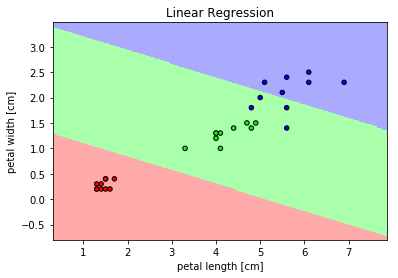

In [13]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title("Linear Regression")

plt.show()